<a href="https://colab.research.google.com/github/vishnu190/PYTHON-PROJECT-CA3/blob/main/Default_credit_card_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/project.csv')
print(data.shape)
print(data.head)
print(data.columns)


(30000, 25)
<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0          1      20000    2  ...         0         0                           1
1          2     120000    2  ...         0      2000                           1
2          3      90000    2  ...      1000      5000                           0
3          4      50000    2  ...      1069      1000                           0
4          5      50000    1  ...       689       679                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996     220000    1  ...      5000      1000                           0
29996  29997     150000    1  ...         0         0                           0
29997  29998      30000    1  ...      2000      3100                           1
29998  29999      80000    1  ...     52964      1804                           1
29999  30000      50000    1  ...      1000      1000   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
print(data.isna().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [58]:
data['default payment next month'].unique() # our target class

array([1, 0])

# **'default payment next month'** is our target class

In [8]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [9]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

data["EDUCATION"] = data["EDUCATION"].replace({4:0,5:0,6:0})
data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [10]:
data["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [11]:
x_train=data[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y_train=data['default payment next month']

In [12]:
print(y_train.head)
y_train.describe()

<bound method NDFrame.head of 0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64>


count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [15]:
df=pd.concat([x_train[['AGE','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',]],y_train],axis=1)


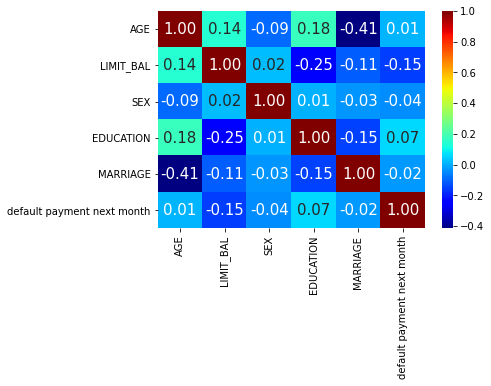

In [16]:
  # PERFORMING CO-RELATIONAL ANALYSIS
col=df.corr()

sns.heatmap(col,annot=True,cmap='jet',fmt='.2f',annot_kws={'size':15},
            cbar=True)
mask = np.zeros_like(col,dtype=np.bool)

cmap = sns.diverging_palette(220,10,as_cmap=True)



#i selected some of the features while creating a HEATMAP ,so that it would be clear

CHECKING THE DEFAULT PAYMENTS FOR NEXT MONTHS 
look down

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Default payments')

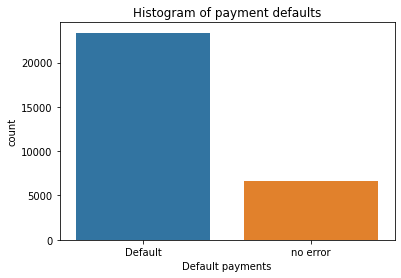

In [35]:
sns.countplot(df['default payment next month'])
plt.title('Histogram of payment defaults')
plt.xticks((0,1),('Default','no error'))
plt.xlabel('Default payments')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


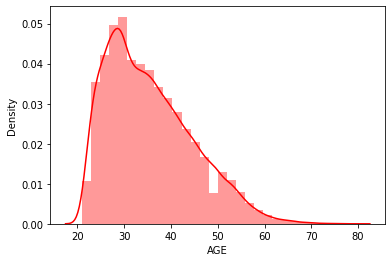

In [66]:
sns.distplot(data['AGE'] ,kde=True, color ='red', bins = 30)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f73dd31a690>,
 [Text(0, 0, 'Not Provided'),
  Text(0, 0, 'Married'),
  Text(0, 0, 'Single'),
  Text(0, 0, 'Unknown')])

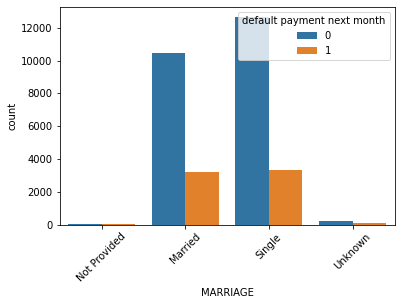

In [37]:
sns.countplot('MARRIAGE',data=data,hue='default payment next month')
plt.xticks((0,1,2,3),('Not Provided','Married','Single','Unknown'),rotation=45)

MARITAL STATUS ANALYSIS=======

in case of MARRIED less defaults

in case of SINGLE less defaults

0 =NO 1= YES


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


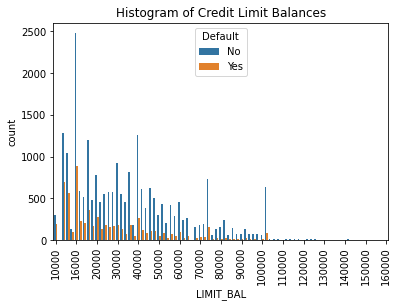

In [38]:
plot = sns.countplot(df['LIMIT_BAL'],hue = df['default payment next month'])
plot.set_xticks(plot.get_xticks()[::5])
plot = plt.xticks(rotation=90)
plt.title('Histogram of Credit Limit Balances')
L = plt.legend(title='Default')
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')

Kind of a hard figure to see but shows the reationship between a persons balance limit and thier defualt. Generally a higher percentage of people with lower limit balances will end up defaulting. If you're a 'high risk' applicant the bank usually will only approve you for a smaller line of credit. This graph might help show why that is.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Educational Distribution')

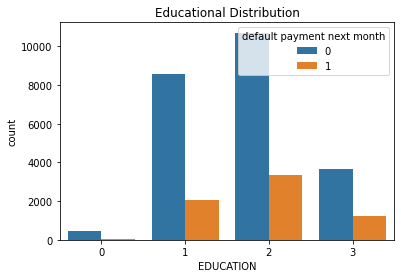

In [39]:
#plot graph of marital status and default payments 
sns.countplot('EDUCATION',hue='default payment next month',data=data)
plt.title('Educational Distribution')

Our debtors are mostly educated people. There appears to be no significance in the relationship between education and defaulting on your credit card.

0 =NO
1= YES

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


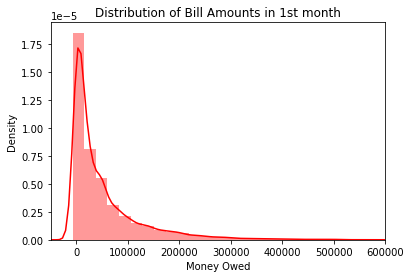

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-50000.0, 600000.0)

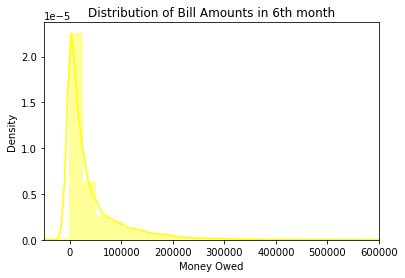

In [40]:
sns.distplot(data['BILL_AMT1'],color='red')
plt.title('Distribution of Bill Amounts in 1st month')
plt.xlabel('Money Owed')
plt.xlim((-50000,600000))
plt.show()
sns.distplot(data['BILL_AMT6'],color='yellow')
plt.title('Distribution of Bill Amounts in 6th month')
plt.xlabel('Money Owed')
plt.xlim((-50000,600000))


The vast majority of people have debt below about 50,000 RS

DENSITY of people has inceased in 6 months 

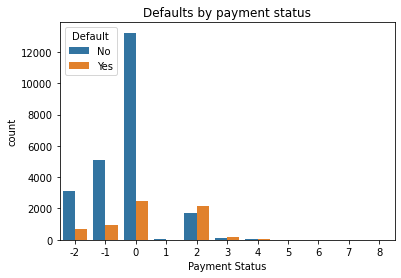

In [41]:
sns.countplot(x='PAY_2', hue = 'default payment next month' , data = data)
plt.title('Defaults by payment status')
plt.xlabel('Payment Status')
L = plt.legend(title='Default')
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')

In [ ]:
#TO find performance 


In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)


In [22]:
pred_train #print

array([0.4749352 , 0.18018483, 0.23151337, ..., 0.72501295, 0.30287945,
       0.27675703])

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE= ",mean_squared_error(y_train,pred_train))
print("R2= ",r2_score(y_train,pred_train))

MSE=  0.15105286300254428
R2=  0.12316496212385741


In [24]:

c=lr.intercept_
m=lr.coef_
print("SLOPE= ",m)
print("INTERCEPT= ",c)


SLOPE=  [-1.47502907e-07 -7.06530720e-08 -1.53158712e-02 -1.85240366e-03
 -2.18344454e-02  1.20503890e-03  9.59263228e-02  1.99484715e-02
  1.18637440e-02  7.48692454e-03 -6.48240118e-07  1.63915393e-07
  2.13237315e-08  3.81656596e-08 -7.58186286e-07 -2.22403003e-07
 -3.56108531e-08 -2.08553668e-07 -2.65810300e-07 -1.29281010e-07]
INTERCEPT=  0.2933661917508323


In [ ]:
#print('y=%.fx + %.2fc'%(m,c))

## going to perform classification and feature scaling

---



---



In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(['default payment next month'],axis=1),data['default payment next month'],
                                               test_size=0.3,random_state=0)
print(data.shape)
print(x_train.shape)
print(x_test.shape)

(30000, 25)
(21000, 24)
(9000, 24)


In [ ]:
from sklearn.preprocessing import StandardScaler # MInMaxScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
print(x_test_std)
print(x_train_std)

In [51]:
##### load classifier
from sklearn.linear_model import Perceptron
ppn=Perceptron()
ppn.fit(x_train_std,y_train)
y_pred_train=ppn.predict(x_train_std)
y_pred_test=ppn.predict(x_test_std)
train_acc=accuracy_score(y_train,y_pred_train)
test_Acc=accuracy_score(y_test,y_pred_test)
print(train_acc)
print(test_Acc)

0.7043809523809523
0.7064444444444444


ACCURACY is decent , but we need higher accuracy

# we are going to do -comparing some classifiers

---



---



In [53]:

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1=Perceptron(eta0=1)
clf2=LogisticRegression(penalty='l2',C=10)
clf3=SVC(C=100,kernel='rbf') # kernel='linear'
clf4=KNeighborsClassifier(n_neighbors=3) # 3-NN
clf5=GaussianNB()
clf6=DecisionTreeClassifier(max_depth=5)
clf7=RandomForestClassifier(max_depth=5)


In [57]:
clf=[clf1,clf2,clf3,clf4,clf5,clf6,clf7]
clf_names=['prec','Logistic Regression','SVM','K Nearest Neighbour','Gaussian NB','Decision Tree','Random Forest']
test={}
T={}
import time
for model,name in zip(clf,clf_names):
  st=time.time()
  model.fit(x_train_std,y_train)
  y_pred=model.predict(x_test_std)
  et=time.time()
  acc=accuracy_score(y_test,y_pred)
  test[name]=np.round(acc*100,decimals=1)
  T[name]=np.round((et-st)*1000,decimals=1) # ms
print(test)
print(T)

{'prec': 70.6, 'Logistic Regression': 81.7, 'SVM': 80.3, 'K Nearest Neighbour': 77.4, 'Gaussian NB': 58.9, 'Decision Tree': 82.4, 'Random Forest': 81.8}
{'prec': 27.8, 'Logistic Regression': 182.3, 'SVM': 140210.7, 'K Nearest Neighbour': 7476.9, 'Gaussian NB': 9.9, 'Decision Tree': 215.5, 'Random Forest': 2775.4}


# DECISION TREE CLASSIFIES is throwing the highest Accuracy among other classifiers 


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import RandomForestClassifier

In [63]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train_std,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
dt_pred=dt.predict(x_test_std)
acc=accuracy_score(dt_pred,y_test)
print(acc)

0.8244444444444444


# performing RANDOM FOREST CLASSIFIER AS PROOF

In [65]:
rf=RandomForestClassifier(max_depth=3)
rf.fit(x_train_std,y_train)
rf_pred=rf.predict(x_test_std)
acc2=accuracy_score(rf_pred,y_test)
print(acc2)

0.8112222222222222


# Clearly DECISION TREE CLASSIFIRE wins over RANDOM FOREST CLASSIFIER

In [74]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      7060
           1       0.36      0.47      0.41      1940

    accuracy                           0.71      9000
   macro avg       0.60      0.62      0.61      9000
weighted avg       0.74      0.71      0.72      9000



In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[5439 1621]
 [1021  919]]


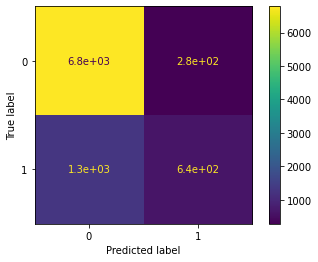

In [72]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf6,x_test_std,y_test)